In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

In [2]:
data = pd.read_csv('enr.csv')

data.dropna(subset=["content"], inplace=True)
data['content'] = data['content'].str.lower()
data['content'] = data['content'].str.strip()

stop_words = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

symbols = str.maketrans('', '', string.punctuation)
data['content'] = data['content'].str.translate(symbols)

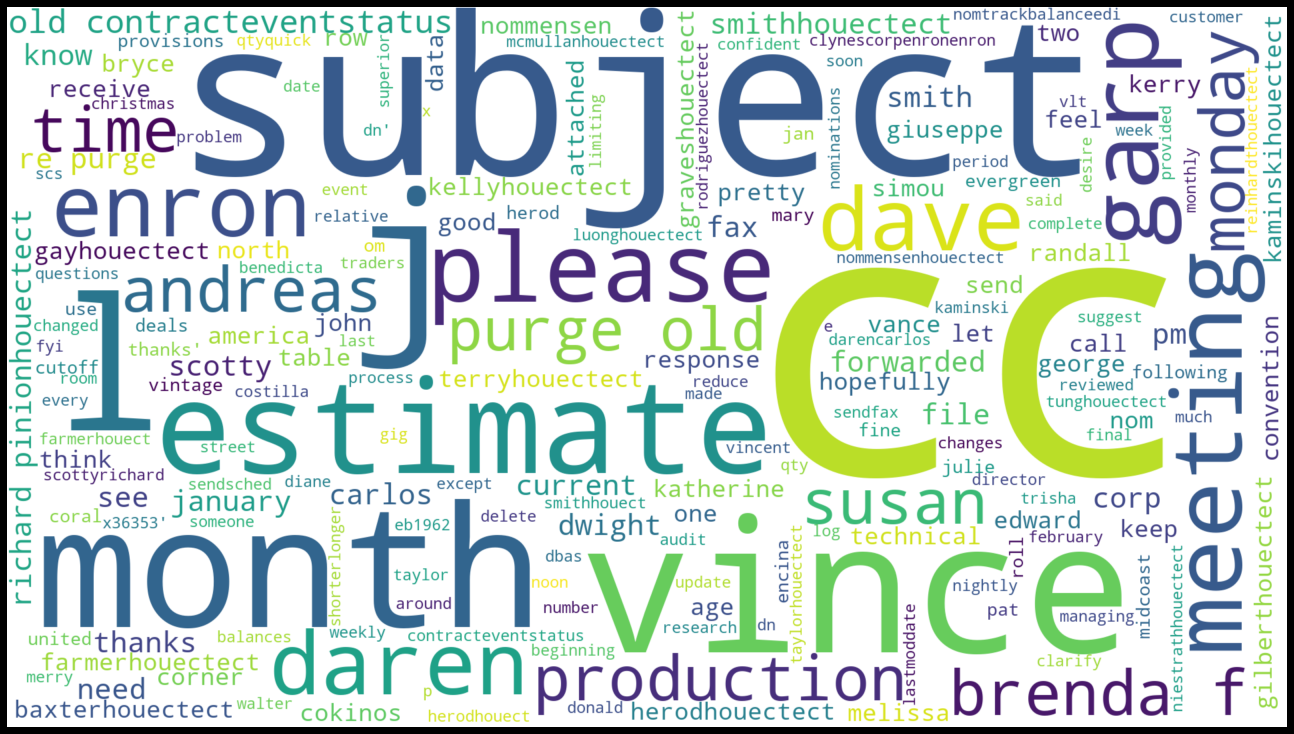

In [3]:
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(str(data['content'].values))
fig = plt.figure(figsize=(20, 10), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [4]:
X = TfidfVectorizer(max_features=5000).fit_transform(data['content'])
y = data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, pred))
print('\n\n\n\n')

Accuracy:  0.8516089465186427





